In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [2]:
columns_names = ['user_id', 'item_id', 'ratings', 'timestamp']

In [5]:
df = pd.read_csv('Movie Dataset.csv')

In [6]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
movies_title = pd.read_csv('Movie_Id_Titles.csv')

In [8]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
df = pd.merge(df, movies_title, on= 'item_id')

In [10]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [12]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head(20)

title
Star Wars (1977)                    584
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     368
Star Trek: First Contact (1996)     365
Name: rating, dtype: int64

In [13]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())

In [14]:
rating['Num of rating'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [15]:
rating.head()

,rating,Num of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

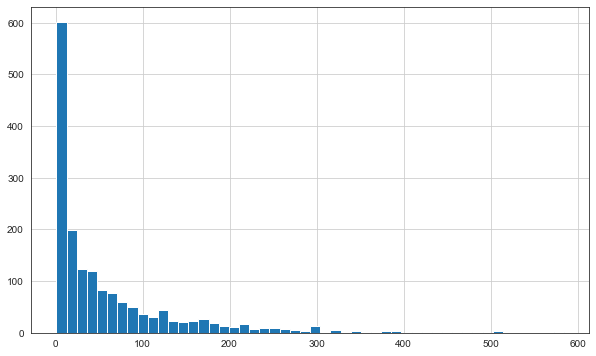

In [16]:
fig = plt.figure(figsize=(10,6))
rating['Num of rating'].hist(bins = 50)

<AxesSubplot:>

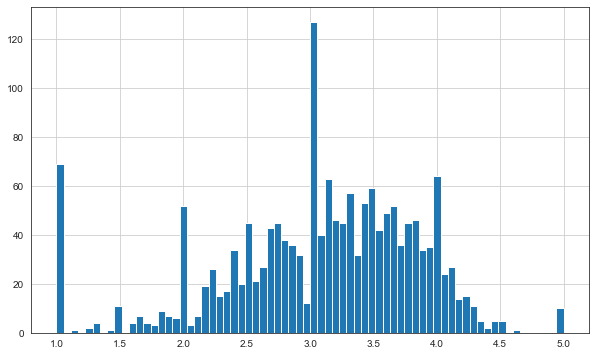

In [17]:
fig = plt.figure(figsize=(10,6))
rating['rating'].hist(bins = 70)

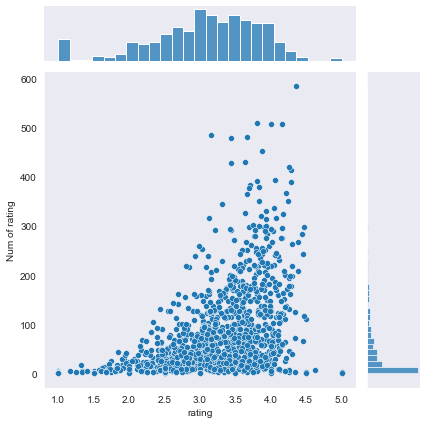

In [18]:
sns.set_style('dark')
sns.jointplot(x ='rating' , y ='Num of rating' , data = rating)

In [19]:
moviemat = df.pivot_table(index = 'user_id', columns='title', values = 'rating')

In [20]:
rating.sort_values('Num of rating', ascending=False).head(20)

,rating,Num of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [23]:
star_wars_rating = moviemat['Star Wars (1977)']
fargo_rating = moviemat['Fargo (1996)']

In [24]:
fargo_rating.head()

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
Name: Fargo (1996), dtype: float64

In [26]:
similar_star_wars = moviemat.corrwith(star_wars_rating)

In [27]:
similar_to_fargo = moviemat.corrwith(fargo_rating)

In [28]:
corr_starwars = pd.DataFrame(similar_star_wars, columns=['Correlations'])

In [29]:
corr_starwars.dropna(inplace=True)

In [30]:
corr_starwars.sort_values('Correlations', ascending=False)

,Correlations
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


In [31]:
corr_starwars = corr_starwars.join(rating['Num of rating'])

In [32]:
corr_starwars.head()

,Correlations,Num of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [34]:
corr_starwars[corr_starwars['Num of rating']>100].sort_values('Correlations',ascending =False)

,Correlations,Num of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [35]:
corr_fargo = pd.DataFrame(similar_to_fargo, columns=['correlation'])

In [36]:
corr_fargo.dropna(inplace=True)

In [37]:
corr_fargo = corr_fargo.join(rating['Num of rating'])

In [38]:
corr_fargo[corr_fargo['Num of rating']>50].sort_values('correlation', ascending = False)

,correlation,Num of rating
title,,
Fargo (1996),1.000000,508
Eve's Bayou (1997),0.658512,64
"MatchMaker, The (1997)",0.605783,51
To Die For (1995),0.551740,87
Bullets Over Broadway (1994),0.491990,86
...,...,...
Robin Hood: Men in Tights (1993),-0.313452,56
"Aristocats, The (1970)",-0.316062,54
Muppet Treasure Island (1996),-0.321453,84
